<a href="https://colab.research.google.com/github/SyedWaqar-ah/practiceInColab/blob/master/model5_newswires_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Multi-label Multi-class Classification Model:


In [0]:
import tensorflow as tf
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
import numpy as np
import pandas as pd


In [0]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

let us sneak at the nature of data

In [38]:
len(train_data), len(test_data),len(train_labels), len(test_labels)

(8982, 2246, 8982, 2246)

In [39]:
train_data[0]

[1,
 2,
 2,
 8,
 43,
 10,
 447,
 5,
 25,
 207,
 270,
 5,
 3095,
 111,
 16,
 369,
 186,
 90,
 67,
 7,
 89,
 5,
 19,
 102,
 6,
 19,
 124,
 15,
 90,
 67,
 84,
 22,
 482,
 26,
 7,
 48,
 4,
 49,
 8,
 864,
 39,
 209,
 154,
 6,
 151,
 6,
 83,
 11,
 15,
 22,
 155,
 11,
 15,
 7,
 48,
 9,
 4579,
 1005,
 504,
 6,
 258,
 6,
 272,
 11,
 15,
 22,
 134,
 44,
 11,
 15,
 16,
 8,
 197,
 1245,
 90,
 67,
 52,
 29,
 209,
 30,
 32,
 132,
 6,
 109,
 15,
 17,
 12]

In [40]:
train_labels[0]

3

In [41]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [42]:
train_data.shape

(8982,)

In [43]:
len(train_data[0]), len(train_data[1])

(87, 56)

to put together the words...

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

557056/550378 [==============================] - 0s 0us/step


In [0]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

Vectorization of Sequence to form input tensor of desired dimensions.

In [45]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# now the form looks different
len(x_train[0]), len(x_test[0]), x_train.shape, x_test.shape

(10000, 10000, (8982, 10000), (2246, 10000))

to One-hot encode the labels...

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
## a built-in way to do the same one hot encoding is,
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)

In [0]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [59]:
history = model.fit(x_train, one_hot_train_labels, epochs=9, batch_size=512, validation_data=(x_test, one_hot_test_labels))

Train on 8982 samples, validate on 2246 samples
Epoch 1/9
8982/8982 [==============================] - 1s 159us/sample - loss: 3.7889 - acc: 0.2285 - val_loss: 3.6915 - val_acc: 0.3620
Epoch 2/9
8982/8982 [==============================] - 1s 136us/sample - loss: 3.5184 - acc: 0.3517 - val_loss: 3.2611 - val_acc: 0.3620
Epoch 3/9
8982/8982 [==============================] - 1s 135us/sample - loss: 2.9819 - acc: 0.3517 - val_loss: 2.6861 - val_acc: 0.3620
Epoch 4/9
8982/8982 [==============================] - 1s 137us/sample - loss: 2.5347 - acc: 0.3517 - val_loss: 2.4580 - val_acc: 0.3620
Epoch 5/9
8982/8982 [==============================] - 1s 135us/sample - loss: 2.4306 - acc: 0.3517 - val_loss: 2.4331 - val_acc: 0.3620
Epoch 6/9
8982/8982 [==============================] - 1s 137us/sample - loss: 2.4160 - acc: 0.3517 - val_loss: 2.4242 - val_acc: 0.3620
Epoch 7/9
8982/8982 [==============================] - 1s 135us/sample - loss: 2.4095 - acc: 0.3517 - val_loss: 2.4210 - val_acc: 

In [56]:
model.evaluate(x_test, one_hot_test_labels)

2246/2246 [==============================] - 0s 122us/sample - loss: 2.4257 - acc: 0.3620


[2.425678851661784, 0.36197686]

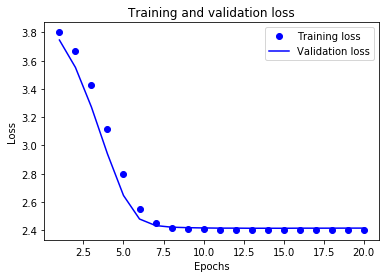

In [51]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

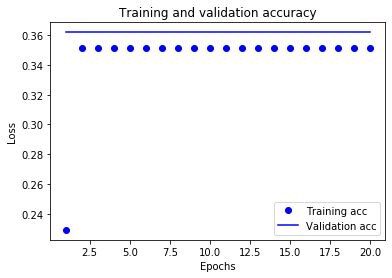

In [52]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()